# Visualization_With_Seaborn

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
sns.set() # 차트 스타일을 설정하는 seaborn 메서드

## Exploring Seaborn Plots

seaborn의 주 목적은 통계 데이터 탐색과 몇 가지 통계 모델 적합에 유용한 다양한 플롯 유형을 생성할 수 있도록 고차원 명령어를 제공하는 것

### Histograms, KDE, and densities

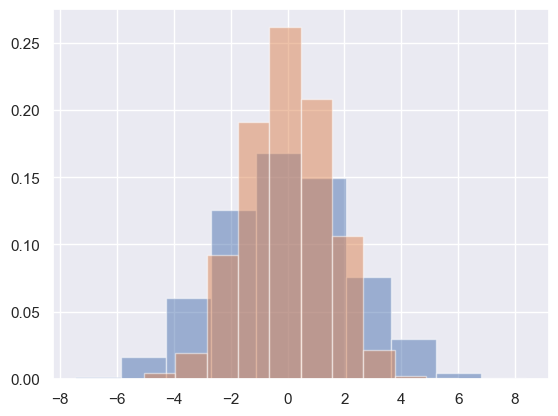

In [3]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
# 데이터 클리닝: 무한 값 대체
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# 분포를 시각화하기 위한 히스토그램
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

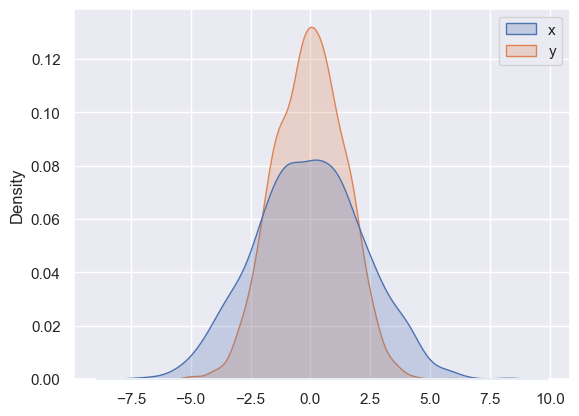

In [4]:
# 분포 시각화를 위한 커널 밀도 추정치
sns.kdeplot(data=data, fill=True);

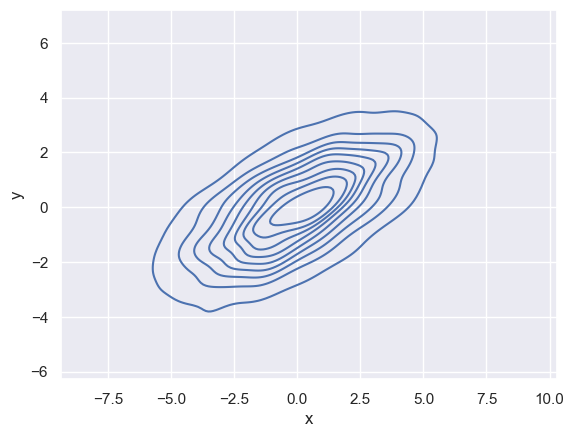

In [5]:
# 2차원 커널 밀도 그래프
sns.kdeplot(data, x='x', y='y');

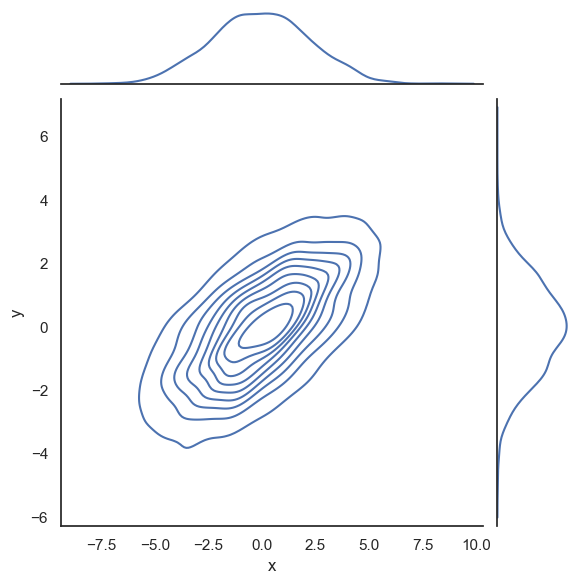

In [6]:
# 결합분포와 한계분포
with sns.axes_style('white'):
    sns.jointplot(data=data, x="x", y="y", kind='kde');

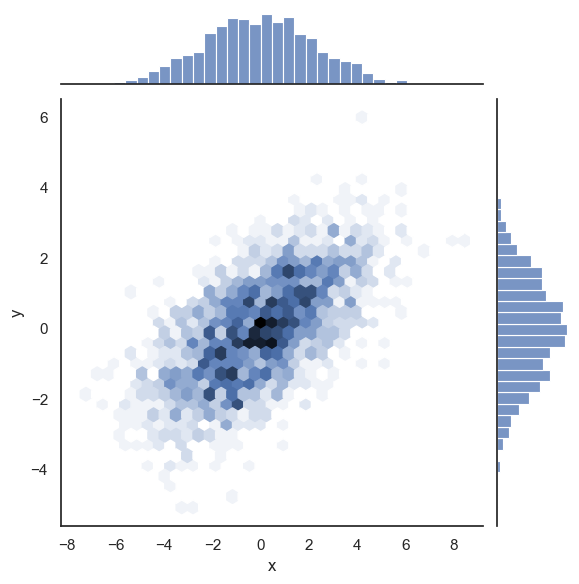

In [7]:
# 육각형 기반
with sns.axes_style('white'):
    sns.jointplot(data=data, x="x", y="y", kind='hex');

### Pair plots

In [8]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


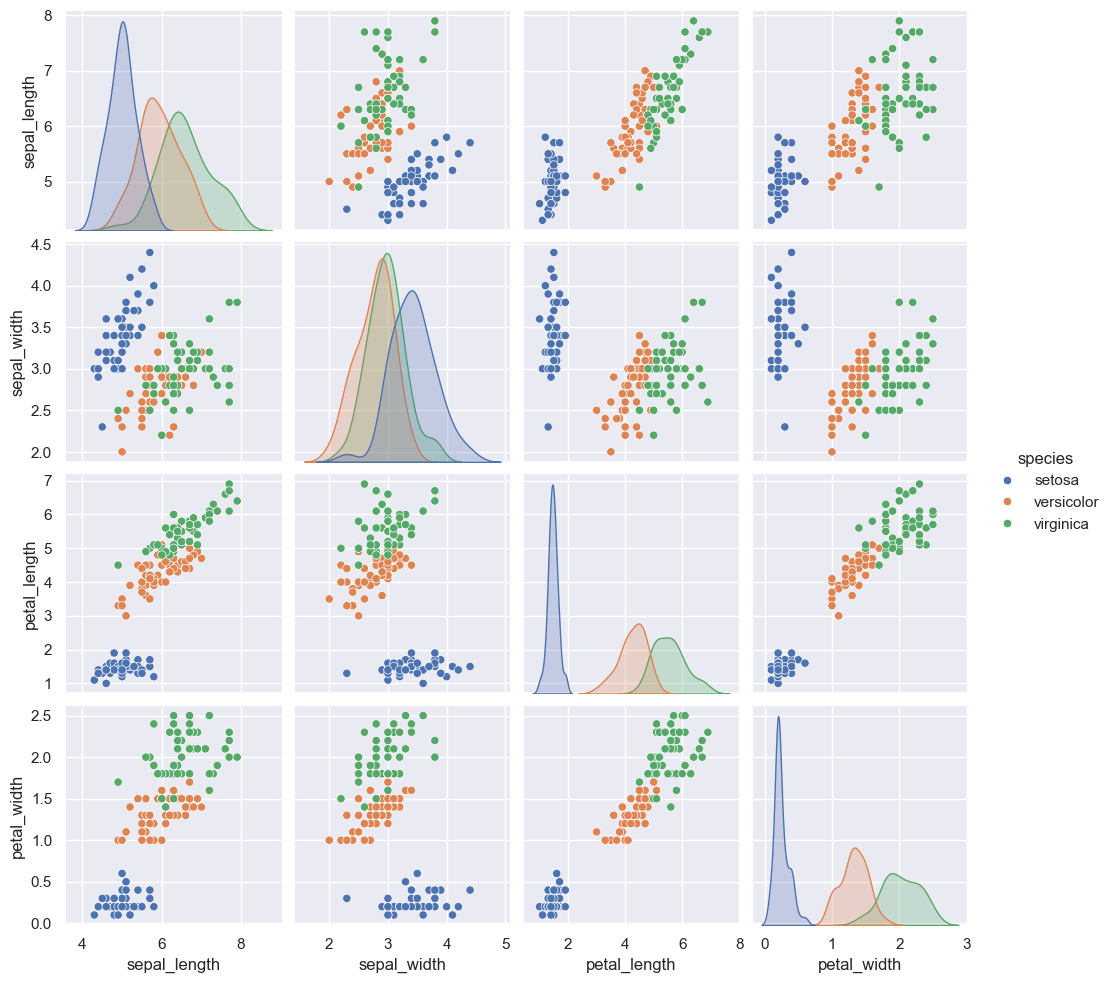

In [9]:
# 표번 사이 다차원 관계 시각화
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

In [10]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


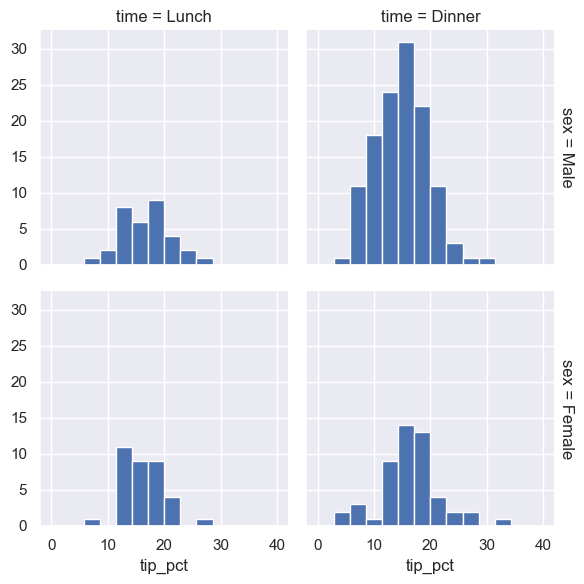

In [11]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### 범주형 플롯 catplots

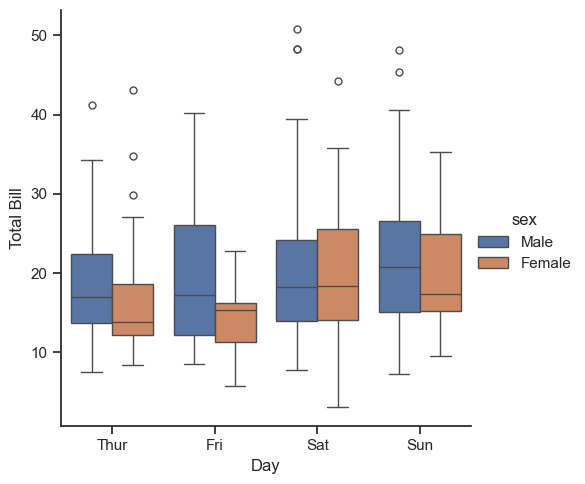

In [12]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

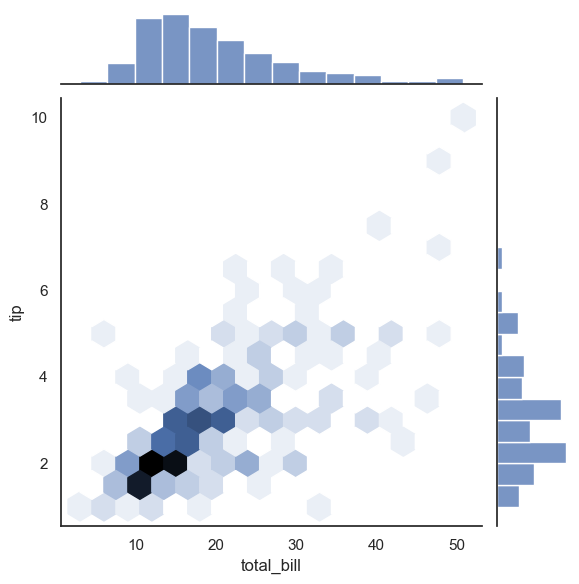

In [13]:
# 결합 분포 플롯
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

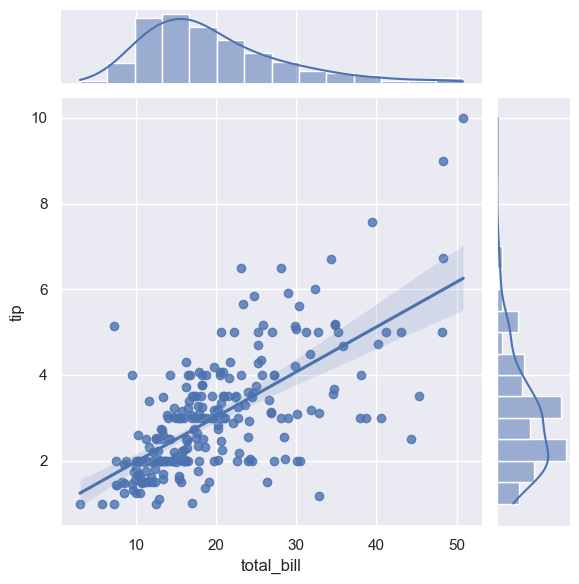

In [14]:
# 자동 커널 밀도 추정과 회귀 분석 수행
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### Bar plots

In [15]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


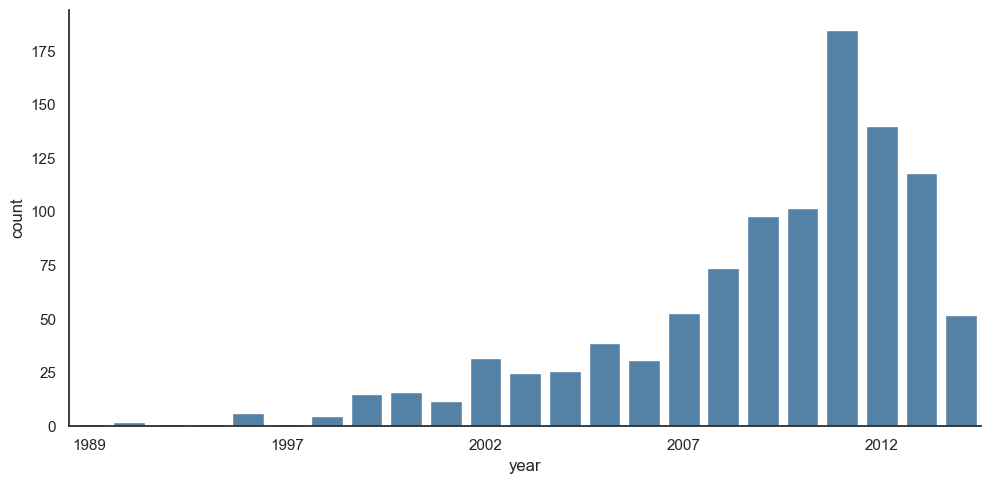

In [16]:
# 요인 플롯의 특별한 경우로 사용된 히스토그램
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

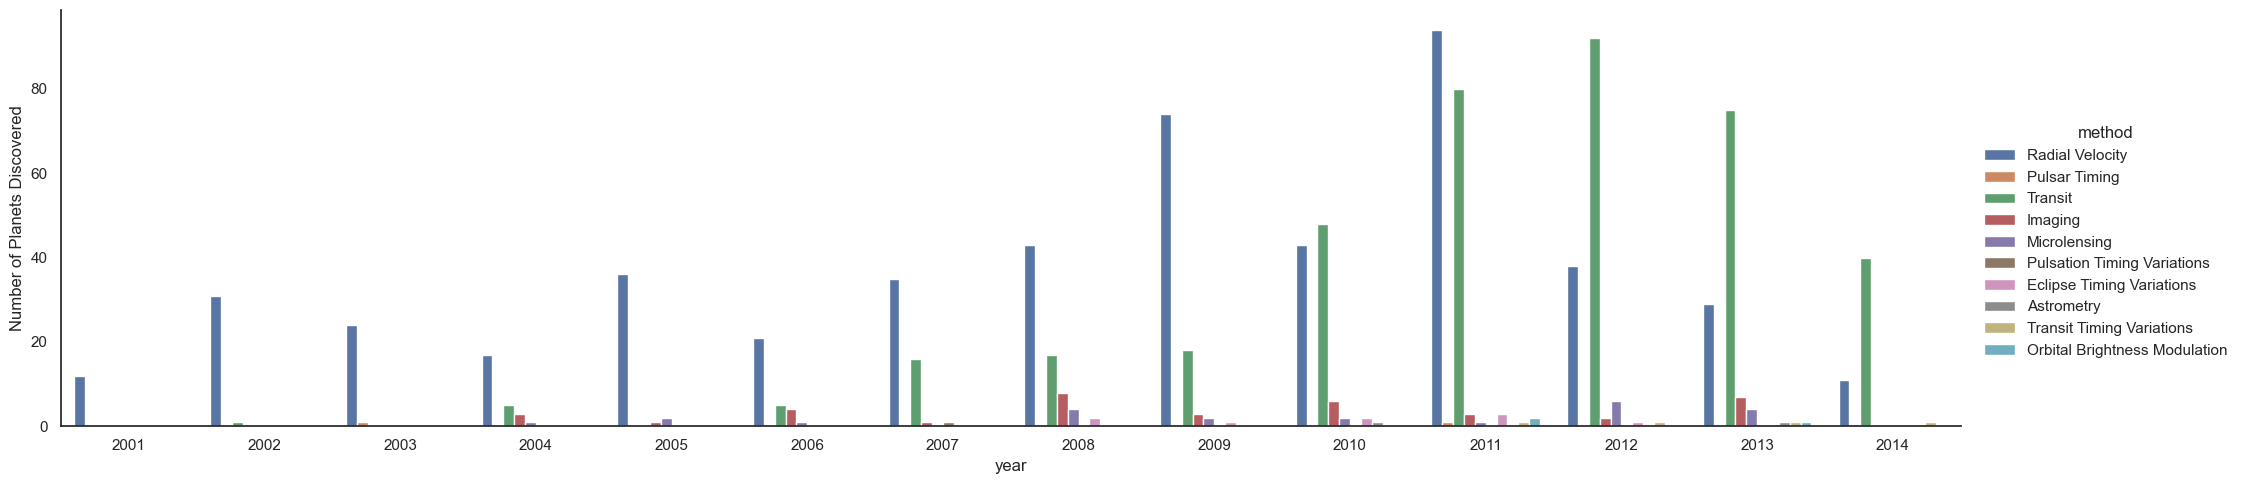

In [17]:
# 연도 및 유형별로 발견된 행성 수
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Example: Exploring Marathon Finishing Times

In [18]:
data = pd.read_csv('./marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [19]:
# 기본적으로 Pandas는 시간 열을 파이썬 문자열로 적재
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [20]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('./marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [21]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [22]:
# Seaborn 플로팅을 목적으로 시간을 초로 제공하는 열 추가
data['split_sec'] = data['split'].dt.total_seconds()
data['final_sec'] = data['final'].dt.total_seconds()
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


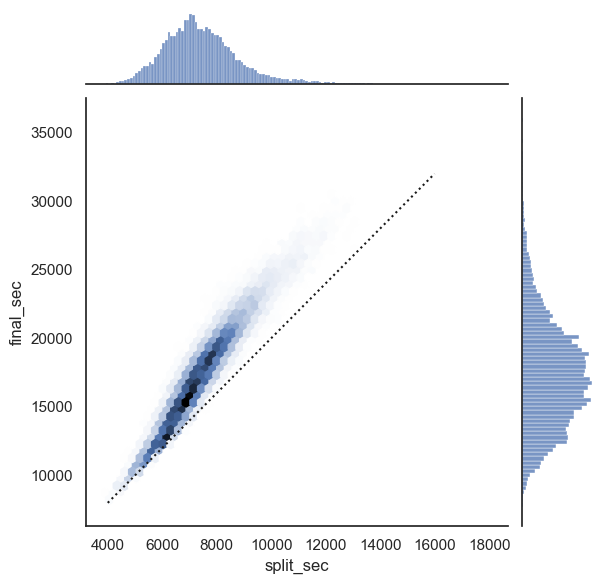

In [23]:
# 데이터 확인을 위한 플로팅
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [24]:
# 주자가 네거티브 스플릿 주자인지 포지티브 스플릿 주자인지 정도를 측정하는 열
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


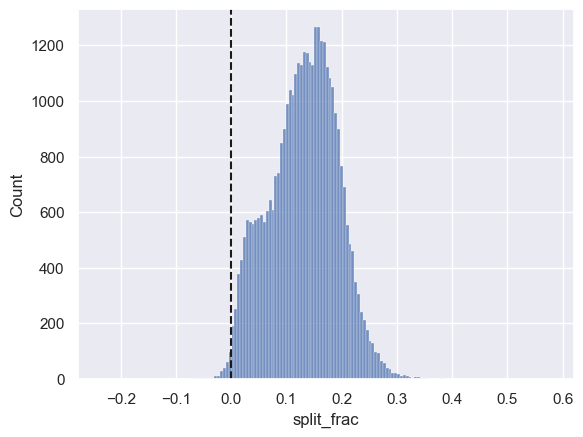

In [25]:
# 만든 열을 통한 분포도
sns.histplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [26]:
# 네거티브 스플릿 수
sum(data.split_frac < 0)

251

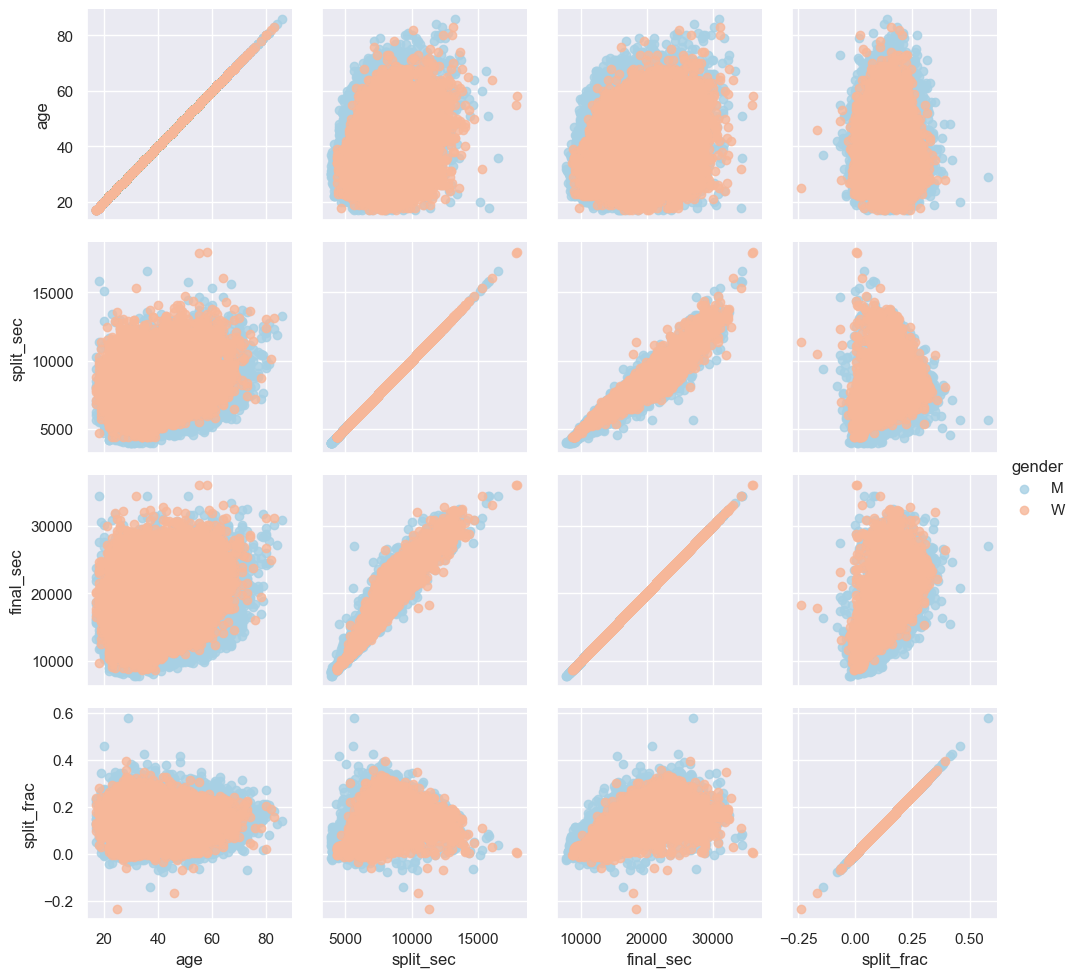

In [27]:
# 스플릿 정도와 다른 변수들 사이에 상관관계 확인
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

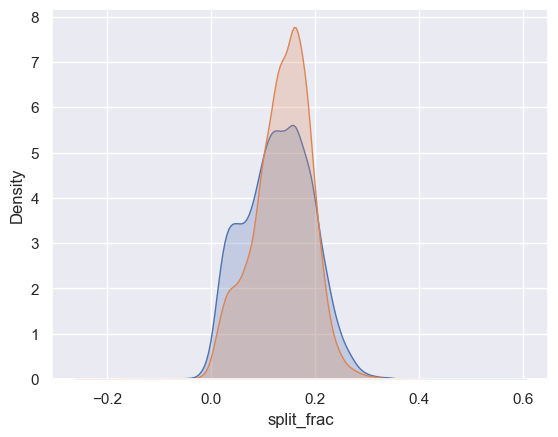

In [28]:
# 남성과 여성 사이 차이
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac');

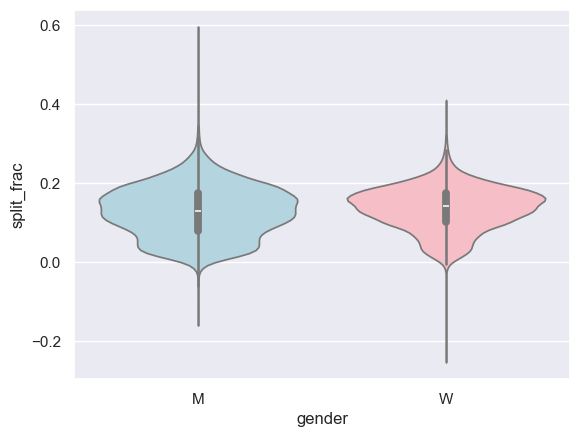

In [29]:
# 나이의 함수로 분포 비교
sns.violinplot(x="gender", y="split_frac", data=data, hue="gender",
               palette=["lightblue", "lightpink"], legend=False);

In [30]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


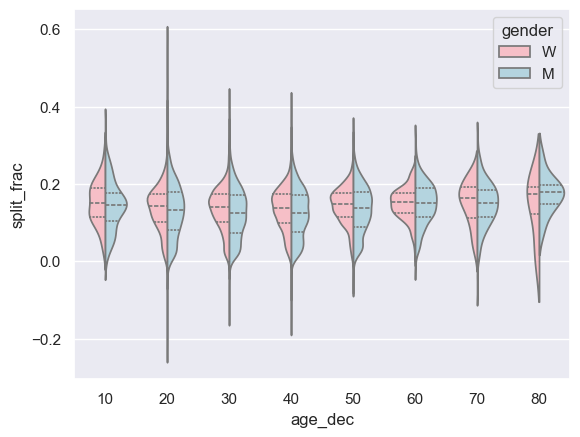

In [31]:
# 나이 함수로 바이올린 플롯 비교
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightpink", "lightblue"]);

In [32]:
# 데이터 표본이 작아 80대 이상 여성의 능력치 이상
(data.age > 80).sum()

7

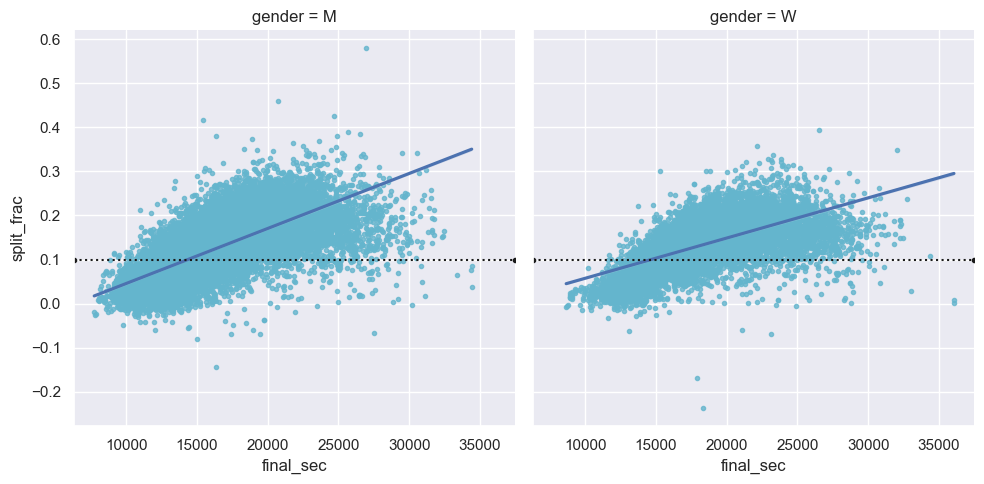

In [33]:
# 데이터에 선형 회귀 모형 자동 적합
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");